# (5주차) 3월30일

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

### 강의영상 

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-wAQvICr34ePlieOT0WBZ3x

### imports 

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
import tensorflow.experimental.numpy as tnp 

In [3]:
tnp.experimental_enable_numpy_behavior() 

### 최적화의 문제 

`-` $loss=(\frac{1}{2}\beta-1)^2$ 

`-` 기존에 했던 방법은 수식을 알고 있어야 한다는 단점이 있음 

### tf.keras.optimizers를 이용한 최적화방법 

#### 방법1: opt.apply_gradients()를 이용 

In [4]:
alpha=0.01/6

In [5]:
opt = tf.keras.optimizers.SGD(learning_rate=alpha)

In [6]:
opt.lr

2022-04-04 09:23:41.660141: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0016666667>

`-` opt에 전달할 입력값을 정리해보자 

In [7]:
beta= tf.Variable(-10.0) 
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-10.0>

In [8]:
with tf.GradientTape(persistent=True) as tape:
    loss = (beta/2-1)**2 
tape.gradient(loss,beta)

<tf.Tensor: shape=(), dtype=float32, numpy=-6.0>

In [9]:
slope= tape.gradient(loss,beta)

`-` iter1: opt.apply_gradients() 에 값을 전달하여 beta를 1회 업데이트
- 주의점: `opt.apply_gradients()`의 입력으로 pair의 list를 전달해야함. 

In [10]:
opt.apply_gradients([(slope,beta)])

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [11]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.99>

`-` iter2 

In [12]:
with tf.GradientTape(persistent=True) as tape:
    loss = (beta/2-1)**2 
slope= tape.gradient(loss,beta)

In [13]:
opt.apply_gradients([(slope,beta)])
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.980008>

`-` for문을 이용한 반복 (정리)

In [14]:
alpha=0.01/6
opt = tf.keras.optimizers.SGD(alpha)
beta= tf.Variable(-10.0) 
for epoc in range(10000):
    with tf.GradientTape(persistent=True) as tape:
        loss = (beta/2-1)**2 
    slope= tape.gradient(loss,beta)
    opt.apply_gradients([(slope,beta)])

In [15]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9971251>

#### 방법2: opt.minimize()

In [16]:
alpha=0.01/6
opt = tf.keras.optimizers.SGD(alpha)
beta= tf.Variable(-10.0) 

In [17]:
loss_fn = lambda: (beta/2-1)**2 

`-` iter1

In [18]:
opt.minimize(loss_fn,beta)

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [19]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.99>

`-` iter2

In [20]:
opt.minimize(loss_fn,beta)
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.980008>

`-` for문을 구하는 코드로 정리 

In [21]:
alpha=0.01/6
opt = tf.keras.optimizers.SGD(alpha)
beta= tf.Variable(-10.0) 
loss_fn = lambda: (beta/2-1)**2 
for epoc in range(10000):
    opt.minimize(loss_fn,beta)

In [22]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9971251>

`-` `tf.keras.optimizers.SGD`와 `tf.optimizers.SGD`의 차이? 없음 

(증거1) 

In [23]:
_opt1=tf.keras.optimizers.SGD()

In [24]:
_opt2=tf.optimizers.SGD()

In [25]:
type(_opt1),type(_opt2)

(keras.optimizer_v2.gradient_descent.SGD,
 keras.optimizer_v2.gradient_descent.SGD)

똑같다..? 

(증거2)

In [26]:
alpha=0.01/6
opt = tf.optimizers.SGD(alpha)
beta= tf.Variable(-10.0) 
loss_fn = lambda: (beta/2-1)**2 
for epoc in range(10000):
    opt.minimize(loss_fn,beta)

In [27]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9971251>

(증거3) 모듈위치가 같다. 

In [28]:
tf.optimizers?

Type:        module
String form: <module 'keras.api._v2.keras.optimizers' from '/home/cgb3/anaconda3/envs/py310/lib/python3.10/site-packages/keras/api/_v2/keras/optimizers/__init__.py'>
File:        ~/anaconda3/envs/py310/lib/python3.10/site-packages/keras/api/_v2/keras/optimizers/__init__.py
Docstring:   Public API for tf.keras.optimizers namespace.


In [29]:
tf.keras.optimizers?

Type:        module
String form: <module 'keras.api._v2.keras.optimizers' from '/home/cgb3/anaconda3/envs/py310/lib/python3.10/site-packages/keras/api/_v2/keras/optimizers/__init__.py'>
File:        ~/anaconda3/envs/py310/lib/python3.10/site-packages/keras/api/_v2/keras/optimizers/__init__.py
Docstring:   Public API for tf.keras.optimizers namespace.


### 회귀분석 

`-` ${\bf y} \approx 4 + 2.5 {\bf x}$

In [30]:
tnp.random.seed(43052)
N = 200 
x = tnp.linspace(0,1,N) 
epsilon = tnp.random.randn(N)*0.5

In [31]:
y= 2.5+4*x+epsilon
y_true = 2.5+4*x

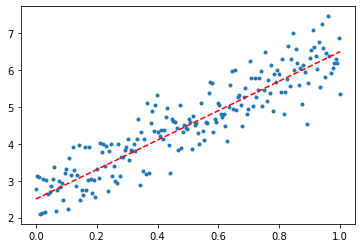

In [32]:
plt.plot(x,y,'.')
plt.plot(x,y_true,'--r')

#### 풀이1

In [33]:
Sxx = sum((x-x.mean())**2) 
Sxy = sum((x-x.mean())*(y-y.mean())) 

In [34]:
beta1_hat = Sxy/Sxx 
beta0_hat = y.mean() - beta1_hat*x.mean()

In [35]:
beta0_hat,beta1_hat

(<tf.Tensor: shape=(), dtype=float64, numpy=2.583667211565867>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.933034516733168>)

#### 풀이2

In [36]:
X=tf.stack([tf.ones(N,dtype='float64'),x],axis=1)
y=y.reshape(N,1) 

In [37]:
X.shape,y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [38]:
tf.linalg.inv(X.T@X)@ X.T @y 

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[2.58366721],
       [3.93303452]])>

#### 풀이3

In [45]:
X.shape,y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [46]:
beta= tnp.array([-5.0,10.0]).reshape(2,1)

In [47]:
slope = -2*X.T@y + 2*X.T@X@beta

In [48]:
slope

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-1820.07378797],
       [ -705.77222696]])>

In [49]:
alpha = 0.001

In [50]:
step = slope * alpha
step 

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-1.82007379],
       [-0.70577223]])>

### 숙제 

`-` 풀이3을 완성하라. 즉 경사하강법을 이용하여 적절한 beta를 추정하라. 

- iteration 횟수는 1000번으로 설정 
- 학습률은 0.001로 설정
- beta의 초기값은 `beta= tnp.array([-5.0,10.0]).reshape(2,1)`